In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from datetime import datetime
import warnings

# 设置字体为 SimHei（黑体）或其他支持中文的字体
matplotlib.rcParams['font.family'] = 'SimHei'
matplotlib.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings('ignore')

print("加载数据（使用逗号分隔符）...")

df = pd.read_csv(
    'olist_analysis_complete.csv',
    encoding='utf-8',
    sep=',',  # 使用逗号作为分隔符
    quotechar='"',
    low_memory=False
)

if df.shape[1] > 1:
    print(" 数据加载成功！")
    print(f"📏 数据集形状: {df.shape}")
    print(f"📋 列数: {len(df.columns)}")
    print(f"📊 行数: {len(df):,}")

    print(f"\n🔤 正确的列名列表:")
    for i, col in enumerate(df.columns, 1):
        print(f"  {i:2d}. {col}")
else:
    print("⚠️ 警告：数据集似乎只有一列，这可能是由于分隔符不正确导致的。")


# 1. 转换 order_purchase_timestamp 列为 datetime 类型
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'], errors='coerce')

# 2. 转换 order_date 列为 datetime 类型
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# 3. 确保 order_month 列为 int64 类型
df['order_month'] = df['order_month'].astype(int)

# 4. 确保 order_year 列为 int64 类型
df['order_year'] = df['order_year'].astype(int)

# 5. 将 review_score 列中的 0 转换为 NaN
df['review_score'] = df['review_score'].replace(0, np.nan)

# 6. 检查转换后的数据类型
print(f"\n📈 数据类型分布:")
print(df.dtypes)

# 7. 检查是否有缺失值
if df.isnull().any().any():
    print("警告：数据中存在缺失值，请检查。")


加载数据（使用逗号分隔符）...
 数据加载成功！
📏 数据集形状: (102580, 20)
📋 列数: 20
📊 行数: 102,580

🔤 正确的列名列表:
   1. order_id
   2. order_purchase_timestamp
   3. order_status
   4. customer_unique_id
   5. customer_state
   6. customer_city
   7. product_id
   8. item_price
   9. freight_value
  10. total_item_value
  11. product_category
  12. payment_type
  13. payment_value
  14. payment_installments
  15. review_score
  16. delivery_status
  17. order_date
  18. order_year
  19. order_month
  20. order_day_of_week

📈 数据类型分布:
order_id                            object
order_purchase_timestamp    datetime64[ns]
order_status                        object
customer_unique_id                  object
customer_state                      object
customer_city                       object
product_id                          object
item_price                         float64
freight_value                      float64
total_item_value                   float64
product_category                    object
payment_type       

In [5]:
print("\n" + "="*60)
print("🔍 数据验证")
print("="*60)

# 显示前3行数据
print("📊 前3行数据:")
print(df.head(3))

# 检查关键列的数据
print(f"\n🔍 关键列样本:")
key_columns = ['order_id', 'order_purchase_timestamp', 'customer_unique_id', 'payment_value', 'review_score']
for col in key_columns:
    if col in df.columns:
        print(f"{col}: {df[col].iloc[0] if len(df) > 0 else 'N/A'}")


🔍 数据验证
📊 前3行数据:
                           order_id order_purchase_timestamp order_status  \
0  0132158c30672a8c52997a2492613ec2      2017-03-13 23:23:23    delivered   
1  00d8d65b666158b633f96054d31af43b      2017-10-13 19:57:48    delivered   
2  05ddf4cc62efcc6f34b8c693eaa2db01      2018-07-03 18:18:34    delivered   

                 customer_unique_id customer_state   customer_city  \
0  520a88dae0fd97b3230c7d36aea4196b             RJ  rio de janeiro   
1  34dd888b565982c76c7a9ee9dc41db4e             GO        anapolis   
2  5c64fc047d4115cc4be24c9c0c9503c2             DF        brasilia   

                         product_id  item_price  freight_value  \
0  e9eebb8e8ba0fadb9020f8ba1c003b48      399.90          13.41   
1  a0450529bd974ebeaf93b1731184396a       94.90          35.98   
2  24c9d329963373e2fccaa3f3204db19e       69.99          18.59   

   total_item_value product_category payment_type  payment_value  \
0            413.31        perfumery  credit_card         41

In [7]:
df[key_columns].head(5)

,order_id,order_purchase_timestamp,customer_unique_id,payment_value,review_score
0,0132158c30672a8c52997a2492613ec2,2017-03-13 23:23:23,520a88dae0fd97b3230c7d36aea4196b,413.31,5.0
1,00d8d65b666158b633f96054d31af43b,2017-10-13 19:57:48,34dd888b565982c76c7a9ee9dc41db4e,130.88,3.0
2,05ddf4cc62efcc6f34b8c693eaa2db01,2018-07-03 18:18:34,5c64fc047d4115cc4be24c9c0c9503c2,88.58,5.0
3,07261a56ea5f8537a7bc47d5155d2f40,2017-03-24 14:40:58,4ab35f739c711caa39bffe9c2422d6c8,75.11,4.0
4,06f0ad130c4b691011f1a12a33649a2b,2018-03-24 15:13:30,409717419af694c5f26f50b9b50714f2,97.39,1.0


In [9]:
print("\n" + "="*60)
print("📊 关键业务指标验证")
print("="*60)

# 计算关键指标
if 'order_id' in df.columns:
    unique_orders = df['order_id'].nunique()
    print(f"✅ 唯一订单数: {unique_orders:,}")

if 'customer_unique_id' in df.columns:
    unique_customers = df['customer_unique_id'].nunique()
    print(f"✅ 唯一客户数: {unique_customers:,}")

if 'product_id' in df.columns:
    unique_products = df['product_id'].nunique()
    print(f"✅ 唯一商品数: {unique_products:,}")

if 'payment_value' in df.columns:
    # 确保payment_value是数值类型
    df['payment_value'] = pd.to_numeric(df['payment_value'], errors='coerce')
    total_sales = df['payment_value'].sum()
    print(f"✅ 总销售额: R$ {total_sales:,.2f}")
    
if 'order_id' in df.columns:
    avg_order_value = total_sales / unique_orders
    print(f"✅ 平均订单价值: R$ {avg_order_value:.2f}")

if 'review_score' in df.columns:
    df['review_score'] = pd.to_numeric(df['review_score'], errors='coerce')
    avg_score = df['review_score'].mean()
    print(f"✅ 平均评分: {avg_score:.2f}")

if 'order_purchase_timestamp' in df.columns:
    df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
    date_range = f"{df['order_purchase_timestamp'].min().strftime('%Y-%m-%d')} 到 {df['order_purchase_timestamp'].max().strftime('%Y-%m-%d')}"
    print(f"✅ 时间范围: {date_range}")


📊 关键业务指标验证
✅ 唯一订单数: 95,123
✅ 唯一客户数: 92,076
✅ 唯一商品数: 31,625
✅ 总销售额: R$ 16,172,106.87
✅ 平均订单价值: R$ 170.01
✅ 平均评分: 4.14
✅ 时间范围: 2016-09-15 到 2018-08-29


In [90]:
df.describe()

,order_purchase_timestamp,item_price,freight_value,total_item_value,payment_value,payment_installments,review_score,order_date,order_year,order_month,order_day_of_week
count,102580,102580.000000,102580.000000,102580.000000,102580.000000,102580.000000,15065.000000,102580,102580.000000,102580.00000,102580.000000
mean,2018-01-01 13:02:23.507525888,123.852674,20.133908,143.986582,157.653606,2.908900,4.140724,2017-12-31 21:45:04.106063360,2017.542162,6.04263,3.916153
min,2016-09-15 12:16:38,0.850000,0.000000,6.080000,0.000000,0.000000,1.000000,2016-09-15 00:00:00,2016.000000,1.00000,1.000000
25%,2017-09-13 10:06:21.249999872,40.000000,13.160000,57.000000,58.320000,1.000000,4.000000,2017-09-13 00:00:00,2017.000000,3.00000,2.000000
50%,2018-01-19 20:57:49.500000,78.000000,16.370000,94.660000,102.740000,2.000000,5.000000,2018-01-19 00:00:00,2018.000000,6.00000,4.000000
75%,2018-05-05 22:15:32.750000128,139.000000,21.260000,161.242500,176.870000,4.000000,5.000000,2018-05-05 00:00:00,2018.000000,8.00000,6.000000
max,2018-08-29 15:00:37,6735.000000,409.680000,6929.310000,13664.080000,24.000000,5.000000,2018-08-29 00:00:00,2018.000000,12.00000,7.000000
std,NaN,188.058850,15.834564,195.248969,217.542559,2.731458,1.298608,NaN,0.503961,3.22129,1.895365


In [29]:
# 计算核心KPI指标
print("\n" + "="*50)
print("📊 核心业务指标分析")
print("="*50)

# 总销售额
total_sales = df['payment_value'].sum()
# 总订单数
total_orders = df['order_id'].nunique()
# 平均订单价值
avg_order_value = total_sales / total_orders
# 客户总数
total_customers = df['customer_unique_id'].nunique()

print(f"💰 总销售额: R$ {total_sales:,.2f}")
print(f"📦 总订单数: {total_orders:,}")
print(f"📊 平均订单价值: R$ {avg_order_value:,.2f}")
print(f"👥 客户总数: {total_customers:,}")
print(f"🛒 客单价: R$ {total_sales/total_customers:,.2f}")


📊 核心业务指标分析
💰 总销售额: R$ 16,172,106.87
📦 总订单数: 95,123
📊 平均订单价值: R$ 170.01
👥 客户总数: 92,076
🛒 客单价: R$ 175.64



📈 数据可视化


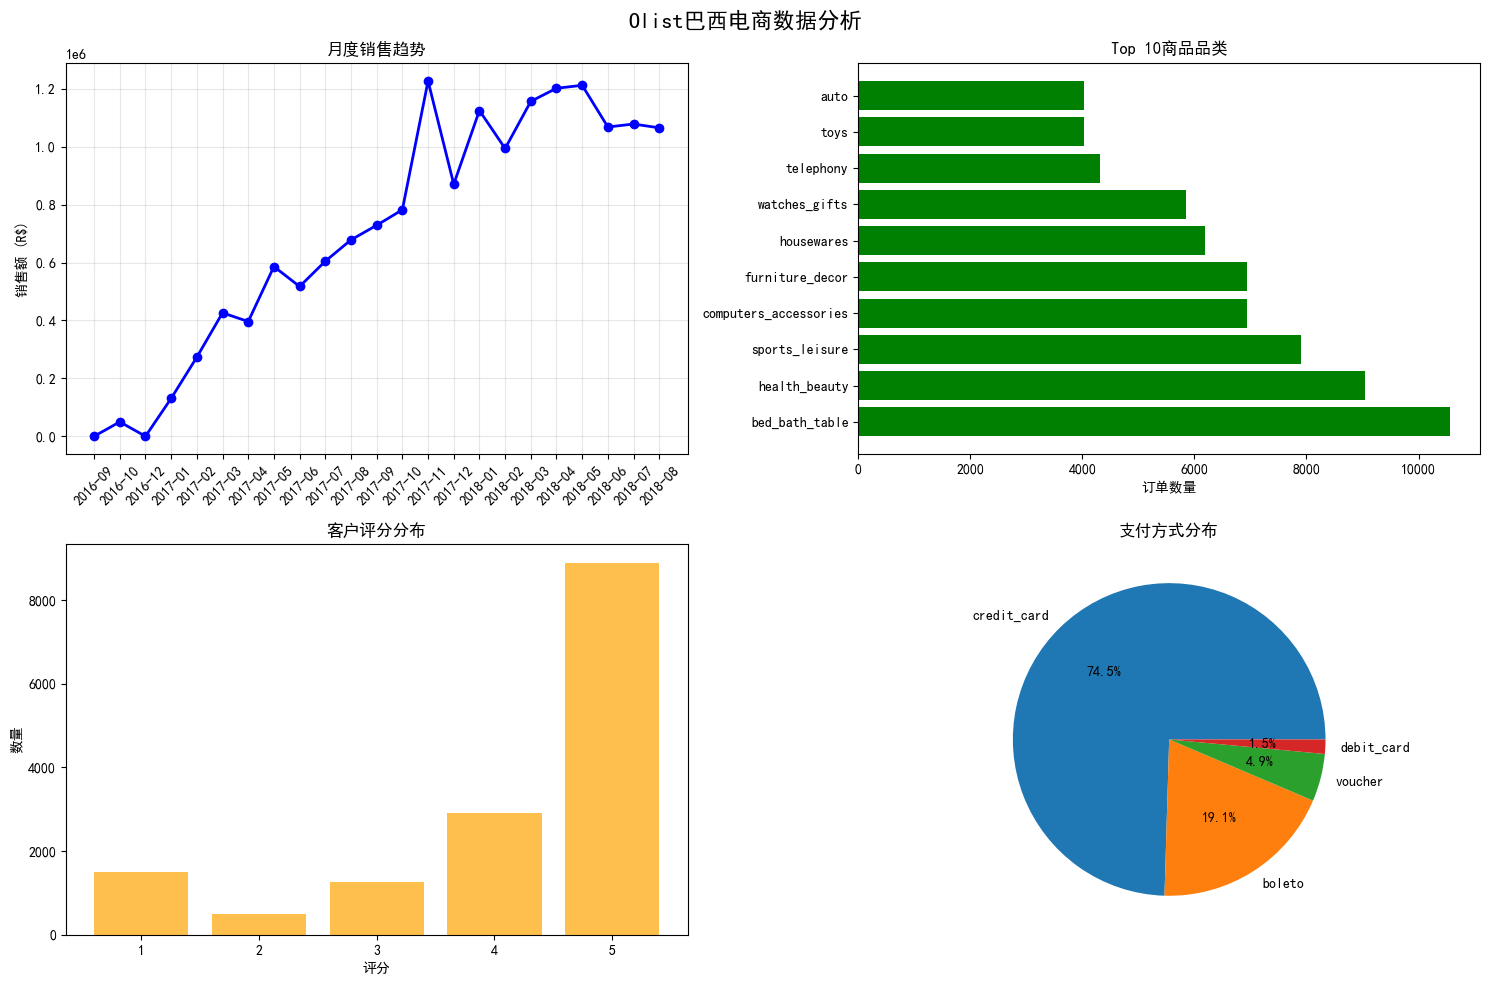

In [11]:
print("\n" + "="*60)
print("📈 数据可视化")
print("="*60)

# 创建可视化图表
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Olist巴西电商数据分析', fontsize=16)

# 图表1：月度销售趋势
try:
    df['order_month'] = df['order_purchase_timestamp'].dt.to_period('M')
    monthly_sales = df.groupby('order_month')['payment_value'].sum()
    
    axes[0, 0].plot(monthly_sales.index.astype(str), monthly_sales.values, 
                   marker='o', linewidth=2, color='blue')
    axes[0, 0].set_title('月度销售趋势')
    axes[0, 0].set_ylabel('销售额 (R$)')
    axes[0, 0].tick_params(axis='x', rotation=45)
    axes[0, 0].grid(True, alpha=0.3)
except Exception as e:
    axes[0, 0].text(0.5, 0.5, f'销售趋势图异常\n{str(e)}', 
                   ha='center', va='center', transform=axes[0, 0].transAxes)
    axes[0, 0].set_title('月度销售趋势')

# 图表2：Top 10商品品类
try:
    top_categories = df['product_category'].value_counts().head(10)
    axes[0, 1].barh(range(len(top_categories)), top_categories.values, color='green')
    axes[0, 1].set_yticks(range(len(top_categories)))
    axes[0, 1].set_yticklabels(top_categories.index)
    axes[0, 1].set_title('Top 10商品品类')
    axes[0, 1].set_xlabel('订单数量')
except Exception as e:
    axes[0, 1].text(0.5, 0.5, f'品类分布图异常\n{str(e)}', 
                   ha='center', va='center', transform=axes[0, 1].transAxes)
    axes[0, 1].set_title('Top 10商品品类')

# 图表3：客户评分分布
try:
    # 过滤掉评分为 NaN 的记录
    rating_counts = df[df['review_score'].notnull()]['review_score'].value_counts().sort_index()
    
    # 绘制柱状图
    axes[1, 0].bar(rating_counts.index, rating_counts.values, color='orange', alpha=0.7)
    axes[1, 0].set_title('客户评分分布')
    axes[1, 0].set_xlabel('评分')
    axes[1, 0].set_ylabel('数量')
except Exception as e:
    # 处理异常情况
    axes[1, 0].text(0.5, 0.5, f'评分分布图异常\n{str(e)}', 
                   ha='center', va='center', transform=axes[1, 0].transAxes)
    axes[1, 0].set_title('客户评分分布')

# 图表4：支付方式分布
try:
    payment_counts = df['payment_type'].value_counts()
    axes[1, 1].pie(payment_counts.values, labels=payment_counts.index, autopct='%1.1f%%')
    axes[1, 1].set_title('支付方式分布')
except Exception as e:
    axes[1, 1].text(0.5, 0.5, f'支付分布图异常\n{str(e)}', 
                   ha='center', va='center', transform=axes[1, 1].transAxes)
    axes[1, 1].set_title('支付方式分布')

plt.tight_layout()
plt.show()

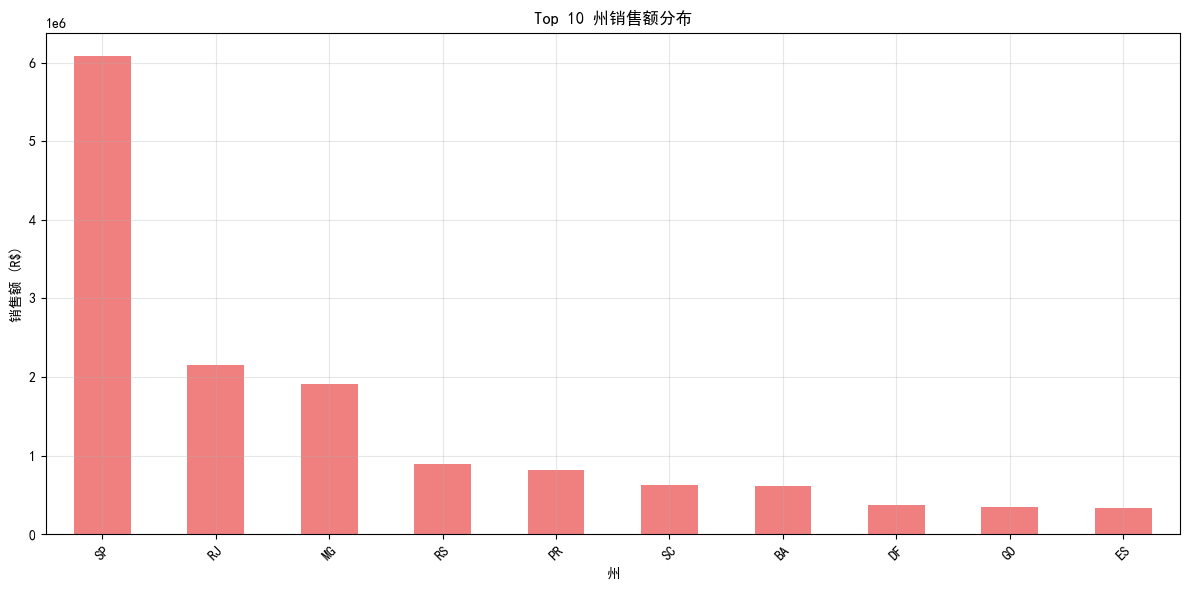

In [13]:
# 地理分布分析
plt.figure(figsize=(12, 6))

try:
    state_sales = df.groupby('customer_state')['payment_value'].sum().sort_values(ascending=False).head(10)
    state_sales.plot(kind='bar', color='lightcoral')
    plt.title('Top 10 州销售额分布')
    plt.ylabel('销售额 (R$)')
    plt.xlabel('州')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"地理分布图异常: {e}")

In [17]:
print("🎯 开始RFM客户价值分析...")
print("="*60)

# 1. 数据准备
print("📊 准备RFM分析数据...")

# 确保使用正确的日期和金额列
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['payment_value'] = pd.to_numeric(df['payment_value'], errors='coerce')

# 设置分析时间点（数据最新日期）
snapshot_date = df['order_purchase_timestamp'].max() + pd.Timedelta(days=1)
print(f"分析基准日期: {snapshot_date}")

# 2. 计算每个客户的RFM值
print("🧮 计算RFM指标...")

rfm = df[df['order_status'] == 'delivered'].groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (snapshot_date - x.max()).days,  # Recency (天数)
    'order_id': 'nunique',  # Frequency (购买次数)
    'payment_value': 'sum'   # Monetary (总消费金额)
}).reset_index()

rfm.columns = ['customer_id', 'recency', 'frequency', 'monetary']

print(f"✅ RFM计算完成，共分析 {len(rfm):,} 位客户")

# 3. RFM指标统计
print("\n📈 RFM指标描述统计:")
print(rfm[['recency', 'frequency', 'monetary']].describe())

# 4. RFM打分（1-5分，5分最高）
print("\n⭐ RFM打分...")

# Recency: 最近购买得分（数值越小得分越高）
rfm['r_score'] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])

# Frequency: 购买频率得分
rfm['f_score'] = pd.qcut(rfm['frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])

# Monetary: 消费金额得分  
rfm['m_score'] = pd.qcut(rfm['monetary'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])

# 创建数值型的RFM分数用于计算
rfm['r_score_num'] = rfm['r_score'].astype(int)
rfm['f_score_num'] = rfm['f_score'].astype(int)
rfm['m_score_num'] = rfm['m_score'].astype(int)

# 5. RFM分群
print("👥 客户分群...")

def assign_rfm_segment(row):
    """根据RFM分数分配客户分群"""
    r, f, m = row['r_score_num'], row['f_score_num'], row['m_score_num']
    
    if r >= 4 and f >= 4 and m >= 4:
        return '冠军客户'
    elif r >= 4 and f >= 3 and m >= 3:
        return '忠诚客户'
    elif r >= 3:
        return '潜力客户'
    elif r >= 2 and f >= 3:
        return '需唤醒客户'
    else:
        return '流失客户'

rfm['rfm_segment'] = rfm.apply(assign_rfm_segment, axis=1)

# 6. 分群结果分析
print("📊 分群结果统计:")
segment_stats = rfm['rfm_segment'].value_counts()
print(segment_stats)

print("\n💰 各分群价值分析:")
segment_value = rfm.groupby('rfm_segment').agg({
    'recency': 'mean',
    'frequency': 'mean', 
    'monetary': ['mean', 'sum', 'count']
}).round(2)

print(segment_value)

🎯 开始RFM客户价值分析...
📊 准备RFM分析数据...
分析基准日期: 2018-08-30 15:00:37
🧮 计算RFM指标...
✅ RFM计算完成，共分析 92,076 位客户

📈 RFM指标描述统计:
            recency     frequency      monetary
count  92076.000000  92076.000000  92076.000000
mean     237.200150      1.033092    175.638678
std      152.559668      0.206865    265.034813
min        1.000000      1.000000      0.000000
25%      114.000000      1.000000     63.100000
50%      218.000000      1.000000    108.640000
75%      346.000000      1.000000    188.320000
max      714.000000     14.000000  15978.650000

⭐ RFM打分...
👥 客户分群...
📊 分群结果统计:
rfm_segment
潜力客户     41810
流失客户     25655
需唤醒客户    10960
忠诚客户      7303
冠军客户      6348
Name: count, dtype: int64

💰 各分群价值分析:
            recency frequency monetary                   
               mean      mean     mean         sum  count
rfm_segment                                              
冠军客户          89.99      1.18   345.00  2190062.35   6348
忠诚客户          90.34      1.02   199.12  1454182.59   7303
流失客户     


📈 RFM分析可视化


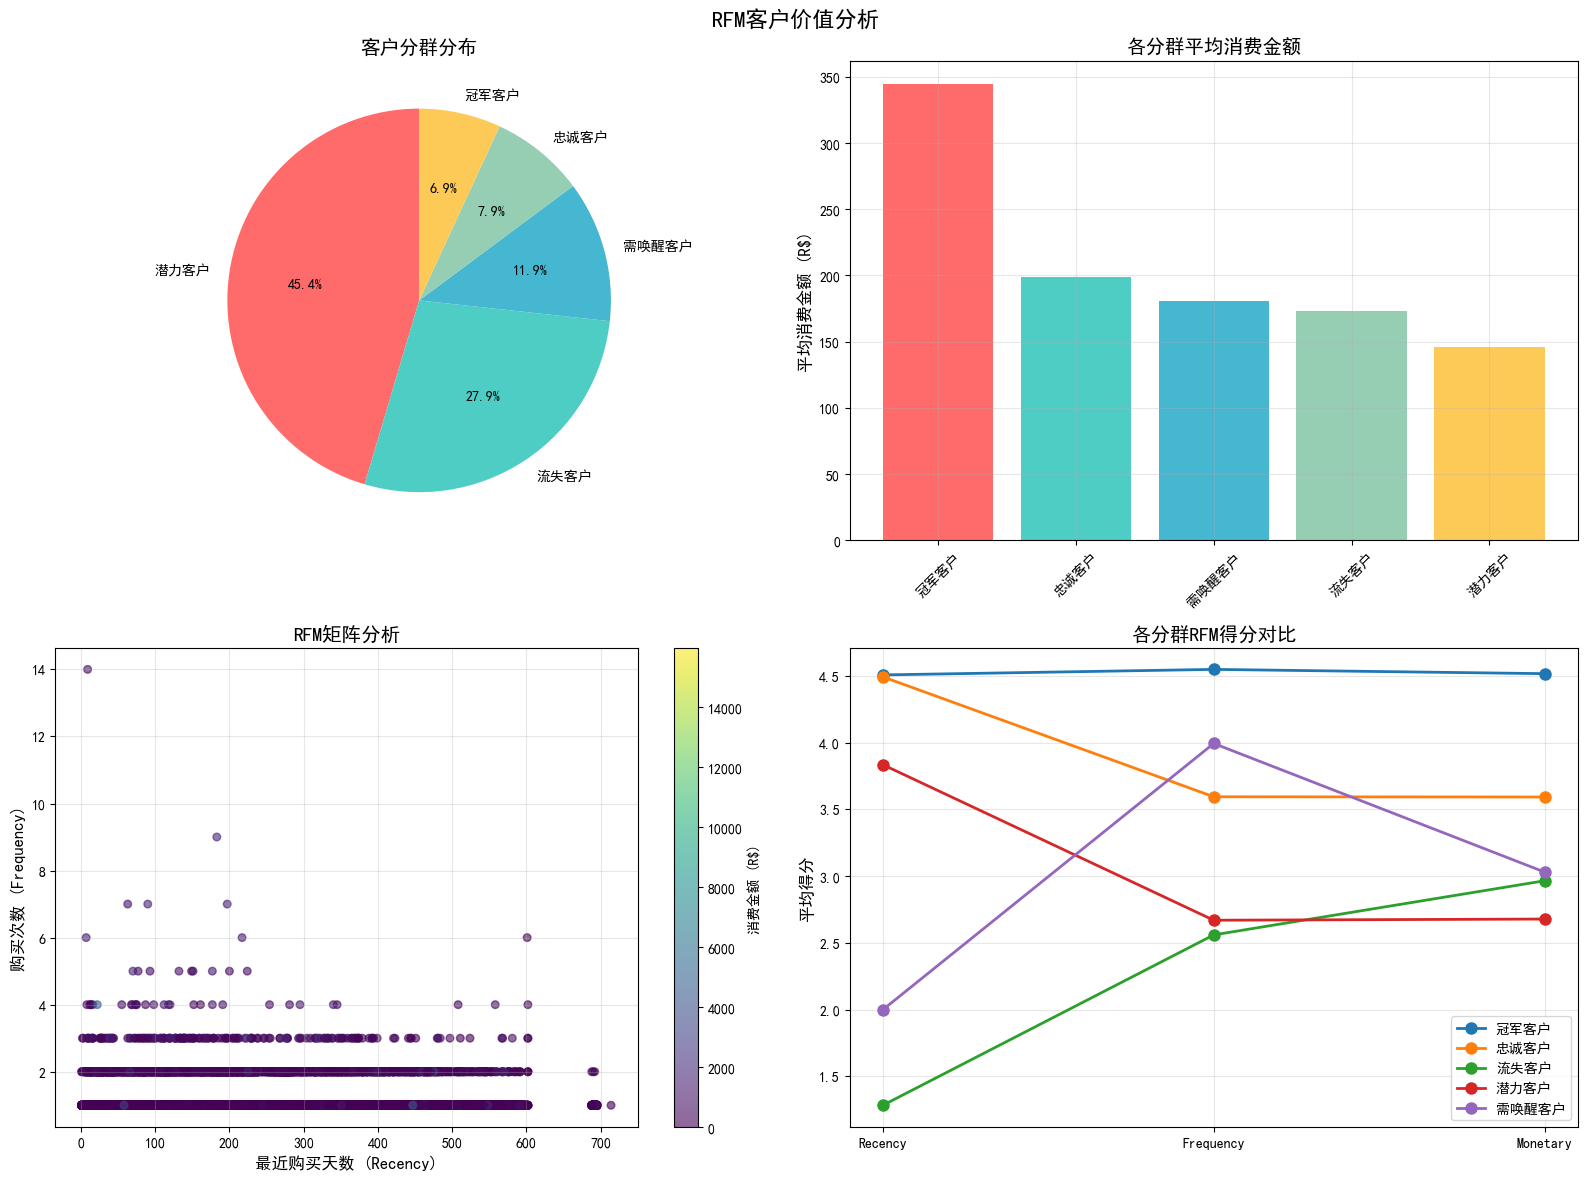

In [81]:
print("\n" + "="*60)
print("📈 RFM分析可视化")
print("="*60)

# 创建可视化图表
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('RFM客户价值分析', fontsize=16, fontweight='bold')

# 图表1：客户分群分布
plt.subplot(2, 2, 1)
segment_counts = rfm['rfm_segment'].value_counts()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57']
plt.pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
plt.title('客户分群分布', fontsize=14, fontweight='bold')

# 图表2：各分群平均价值比较
plt.subplot(2, 2, 2)
segment_means = rfm.groupby('rfm_segment')['monetary'].mean().sort_values(ascending=False)
plt.bar(segment_means.index, segment_means.values, color=colors[:len(segment_means)])
plt.title('各分群平均消费金额', fontsize=14, fontweight='bold')
plt.ylabel('平均消费金额 (R$)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# 图表3：RFM矩阵散点图
plt.subplot(2, 2, 3)
scatter = plt.scatter(rfm['recency'], rfm['frequency'], 
                     c=rfm['monetary'], cmap='viridis', alpha=0.6, s=30)
plt.colorbar(scatter, label='消费金额 (R$)')
plt.xlabel('最近购买天数 (Recency)', fontsize=12)
plt.ylabel('购买次数 (Frequency)', fontsize=12)
plt.title('RFM矩阵分析', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# 图表：各分群RFM得分对比
plt.subplot(2, 2, 4)
# 使用数值型分数计算各分群的平均RFM得分
segment_rfm = rfm.groupby('rfm_segment')[['r_score_num', 'f_score_num', 'm_score_num']].mean()

# 绘制所有分群的RFM得分
for i, (segment, scores) in enumerate(segment_rfm.iterrows()):
    plt.plot(range(3), scores.values, marker='o', label=segment, linewidth=2, markersize=8)

plt.xticks(range(3), ['Recency', 'Frequency', 'Monetary'])
plt.ylabel('平均得分', fontsize=12)
plt.title('各分群RFM得分对比', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)


plt.tight_layout()
plt.show()